<a href="https://colab.research.google.com/github/MarinaChau/F1-Hackathon-2022/blob/main/Notebooks/WeatherForecast_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Only with gooogle colab 
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and preprocess dataset

In [ ]:
# %cd "/content/drive/MyDrive/WeatherForecast/"
%cd "/content/drive/MyDrive/Travail/Hackathon/dataset" #/dataset_reoganized_extended_v1.pkl

[Errno 2] No such file or directory: '/content/drive/MyDrive/Travail/Hackathon/dataset #/dataset_reoganized_extended_v1.pkl'
/content


In [ ]:
# Standard libraries
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sys.path.append("/content/drive/MyDrive/Travail/Hackathon/code/src/")

## ThirdParty libraries
import preprocessing_dataset



    

In [ ]:
filepath = '/content/drive/MyDrive/WeatherForecast/weather_json.csv.zip'

with ZipFile(filepath, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

NameError: ignored

In [ ]:
# Parameters
columns_to_drop = ["M_PLAYER_CAR_INDEX", "M_FRAME_IDENTIFIER", "M_SESSION_TIME", "GAMEHOST", "M_SECONDARY_PLAYER_CAR_INDEX", 
                   "M_PIT_STOP_WINDOW_IDEAL_LAP", "M_GAME_MINOR_VERSION", "M_GEARBOX_ASSIST", 
                   "M_SLI_PRO_NATIVE_SUPPORT", "M_SAFETY_CAR_STATUS",
                   "M_SEASON_LINK_IDENTIFIER", "M_PIT_ASSIST", "M_FORMULA", "M_WEEKEND_LINK_IDENTIFIER", 
                   "M_PIT_STOP_REJOIN_POSITION", "M_PIT_SPEED_LIMIT", "M_DYNAMIC_RACING_LINE",
                   "M_PIT_RELEASE_ASSIST", "M_PIT_STOP_WINDOW_LATEST_LAP", 
                   "M_PACKET_FORMAT", "M_GAME_MAJOR_VERSION", "M_PACKET_VERSION", 
                   "M_PACKET_ID", "M_AI_DIFFICULTY", 
                   "M_IS_SPECTATING", "M_DRSASSIST", "M_NUM_MARSHAL_ZONES", "M_STEERING_ASSIST",
                   "M_NETWORK_GAME","M_ERSASSIST","M_BRAKING_ASSIST","M_SPECTATOR_CAR_INDEX",
                   "M_DYNAMIC_RACING_LINE_TYPE", "UNNAMED: 0",
                   "M_TOTAL_LAPS"]


filepath_save = '/content/drive/MyDrive/WeatherForecast/dataset_reoganized_v8.pkl'
filepath_load = "/content/weather_json.csv"
cols_idx_groupby = "M_SESSION_LINK_IDENTIFIER"


In [ ]:
# Create instance of class PreprocessingDataset
prep = preprocessing_dataset.PreprocessDataset(filepath_load, filepath_save, columns_to_drop, cols_idx_groupby, zipped=False)
list_sessions_dataframe = prep.run_proprocessing()

In [ ]:
list_sessions_dataframe[0].head()

,M_SESSION_LINK_IDENTIFIER,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_SESSION_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_WEATHER,M_SESSION_UID,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,TIME_SESSION
806404,18385973,1.643564e+09,33,4910,0,0,25,10,27,8,0,1080,0,6466960681235996680,8,0,2,2,1,1080
806405,18385973,1.643564e+09,33,4910,0,0,25,10,27,8,0,1080,0,6466960681235996680,8,5,2,2,1,1080
806406,18385973,1.643564e+09,33,4910,0,0,25,10,27,8,0,1080,0,6466960681235996680,8,10,2,2,1,1080
806401,18385973,1.643564e+09,33,4910,0,0,25,10,27,8,1,1080,0,6466960681235996680,8,0,2,2,1,1079
806402,18385973,1.643564e+09,33,4910,0,0,25,10,27,8,1,1080,0,6466960681235996680,8,5,2,2,1,1079


In [ ]:
with open("dataset_reoganized_v8.pkl", 'rb') as handle:
    list_sessions_dataframe = pickle.load(handle)

# Data Exploration

### Some stats



In [ ]:
# Counts the items for each classes
# Weather - 0 = clear, 1 = light cloud, 2 = overcast
        # 3 = light rain, 4 = heavy rain, 5 = storm

weather_class_label = ["clear",
                 "light_cloud",
                 "overcast",
                 "light_rain",
                 "heavy_rain",
                 "storm"]

weather_class = {0:[],
                 1:[],
                 2:[],
                 3:[],
                 4:[],
                 5:[]}

for idx, df in enumerate(list_sessions_dataframe):
    i = len(df['M_WEATHER'].value_counts())
    for j in range(i):
        weather_class[j].append(df['M_WEATHER'].value_counts().iloc[j-1])

for i in range(6):
    weather_class[i] = sum(weather_class[i])

print("Counts of items per class:", weather_class)

for i in range(6):
    print(f"% of class {i}: {weather_class[i]/sum(weather_class.values()) * 100}")

Counts of items per class: {0: 376767, 1: 101197, 2: 28108, 3: 13216, 4: 4946, 5: 850}
% of class 0: 71.75366227117946
% of class 1: 19.272535441948335
% of class 2: 5.353048274180893
% of class 3: 2.516930624433424
% of class 4: 0.9419445269709228
% of class 5: 0.161878861286956


The dataset is very unbalanced towards class 0. 

In [ ]:
best = 0  # Search for the longest shape
for idx, df in enumerate(list_sessions_dataframe):
    if best < df.shape[0]:
        best = df.shape[0]
        longest_df = idx
dataframe_eda = list_sessions_dataframe[longest_df]

### 1. Dropping not relevant columns to our model


In [ ]:
for col in dataframe_eda.columns:
    if dataframe_eda[col].std() == 0:
        print(col)

dataframe_eda_new = dataframe_eda.drop(columns=["M_SESSION_LINK_IDENTIFIER",
"M_TRACK_LENGTH",
"M_GAME_PAUSED",
"M_FORECAST_ACCURACY",
"M_NUM_WEATHER_FORECAST_SAMPLES",
"M_TRACK_ID",
"M_SESSION_TYPE",
"M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE","M_SESSION_UID",
"TIMESTAMP",
"M_SESSION_DURATION",
"M_SESSION_TIME_LEFT"], axis=1).copy()

M_SESSION_LINK_IDENTIFIER
M_TRACK_LENGTH
M_FORECAST_ACCURACY
M_NUM_WEATHER_FORECAST_SAMPLES
M_TRACK_ID
M_SESSION_TYPE
M_SESSION_DURATION
M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE


### 2. Check type of weather in the dataset. 

In [ ]:
dataframe_eda_new["M_WEATHER"].value_counts() # Clear, light cloud

2    5504
1    4926
3    3896
0    1622
Name: M_WEATHER, dtype: int64

In [ ]:
weather_data = dataframe_eda_new.set_index(["TIME_SESSION", "M_TIME_OFFSET"]).copy()
weather_data.head()

M_TRACK_TEMPERATURE  ...  M_RAIN_PERCENTAGE
TIME_SESSION M_TIME_OFFSET                       ...                   
7063         0                               32  ...                  7
             5                               32  ...                  5
             10                              33  ...                  4
             15                              32  ...                  8
             30                              30  ...                 19

[5 rows x 6 columns]

In [ ]:
weather_data.nunique() # Count the number of unique element per feature

M_TRACK_TEMPERATURE            6
M_AIR_TEMPERATURE              4
M_WEATHER                      4
M_TRACK_TEMPERATURE_CHANGE     3
M_AIR_TEMPERATURE_CHANGE       3
M_RAIN_PERCENTAGE             79
dtype: int64

We noticed that there aren't many variations in the largest session (1h).

In [ ]:
# ground_truth_weather_data 
weather_data_gt = weather_data.loc[(slice(None), 0), :].copy()
weather_data_gt.reset_index(level=1, inplace=True)
weather_data_gt.head(50)

,M_TIME_OFFSET,M_TRACK_TEMPERATURE,M_AIR_TEMPERATURE,M_WEATHER,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE
TIME_SESSION,,,,,,,
7063,0,32,24,1,2,2,7
7062,0,32,24,1,2,2,7
7061,0,32,24,1,2,2,7
7060,0,32,24,1,2,2,7
7059,0,32,24,1,2,2,7
7058,0,32,24,1,2,2,7
7057,0,32,24,1,2,2,7
7056,0,32,24,1,2,2,7
7055,0,32,24,1,2,2,7


weather_data_gt.reset_index(level=1, inplace=True)

In [ ]:
# Setting plot style
sns.set_style(style='whitegrid')

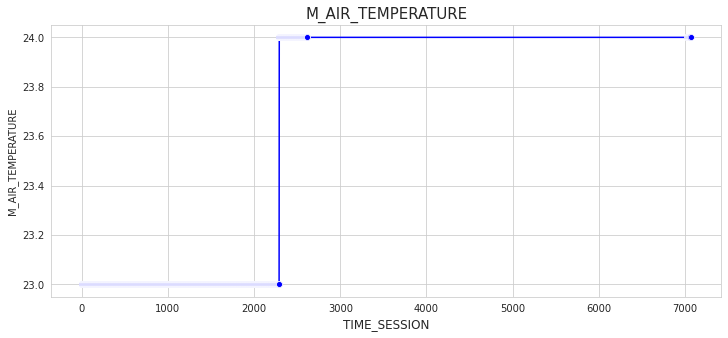

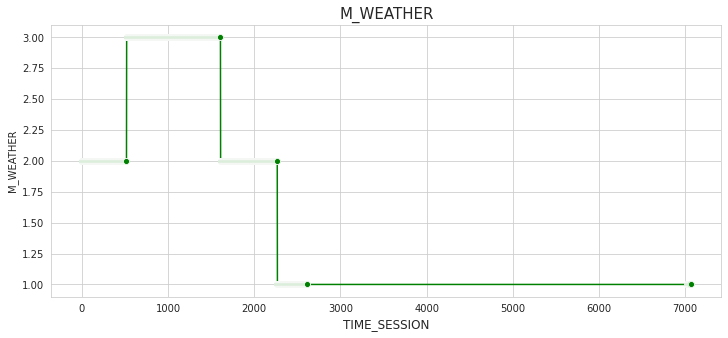

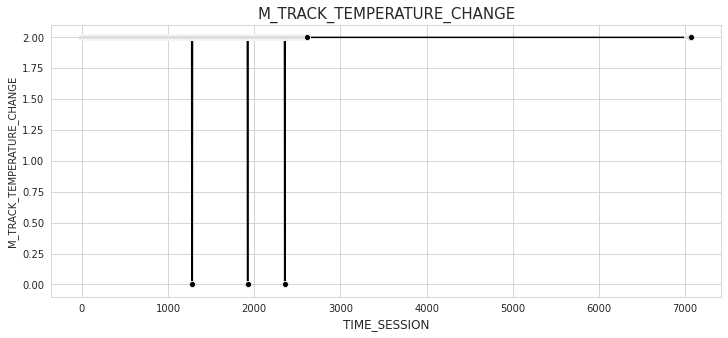

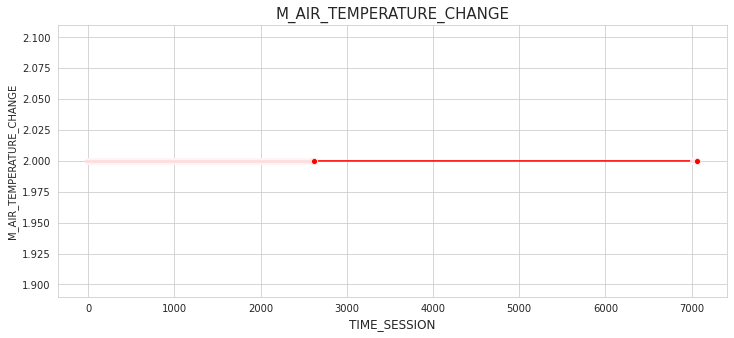

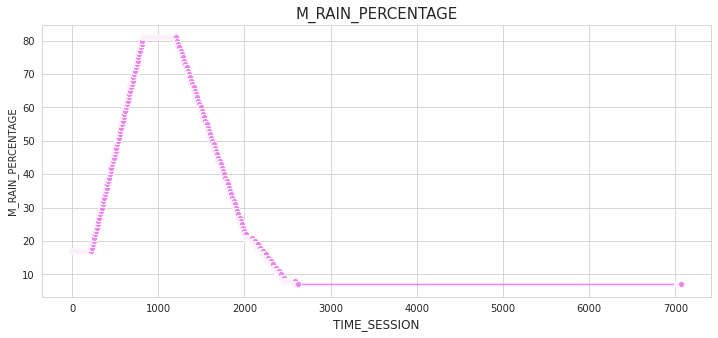

In [ ]:
# Plotting Weather Data
color={2:'blue',
       3:'green',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('TIME_SESSION', fontsize=12)
    plt.title('{}'.format(weather_data_gt.columns[index].upper()), fontsize=15)
    sns.lineplot(data=weather_data_gt.iloc[:,index], marker='o',  color=color[index])
    plt.show()

### Ground truth correlation between features

In [ ]:
# one-hot encode the features M_WEATHER
dummy1 = pd.get_dummies(weather_data['M_WEATHER'], drop_first=True)

In [ ]:
weather_data = pd.concat([weather_data, dummy1], axis=1).drop("M_WEATHER", axis=1)

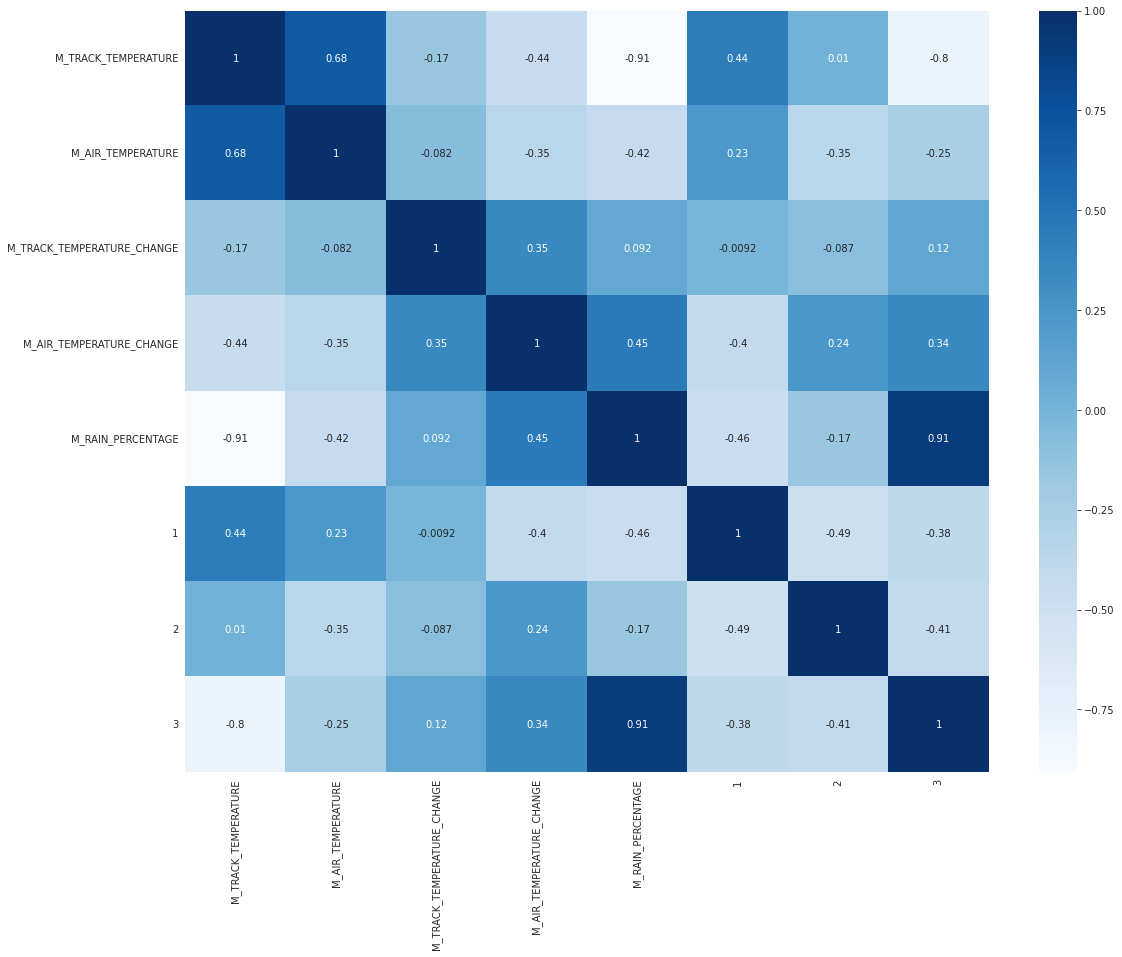

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(data=weather_data.corr(), annot=True, cmap='Blues')
plt.show()


In [ ]:
indices = ['M_AIR_TEMPERATURE', 'M_TRACK_TEMPERATURE','M_RAIN_PERCENTAGE', 'M_WEATHER']
extr_data = weather_data_gt.loc[:,indices]
extr_data.head()

,M_AIR_TEMPERATURE,M_TRACK_TEMPERATURE,M_RAIN_PERCENTAGE,M_WEATHER
TIME_SESSION,,,,
7063,24,32,7,1
7062,24,32,7,1
7061,24,32,7,1
7060,24,32,7,1
7059,24,32,7,1


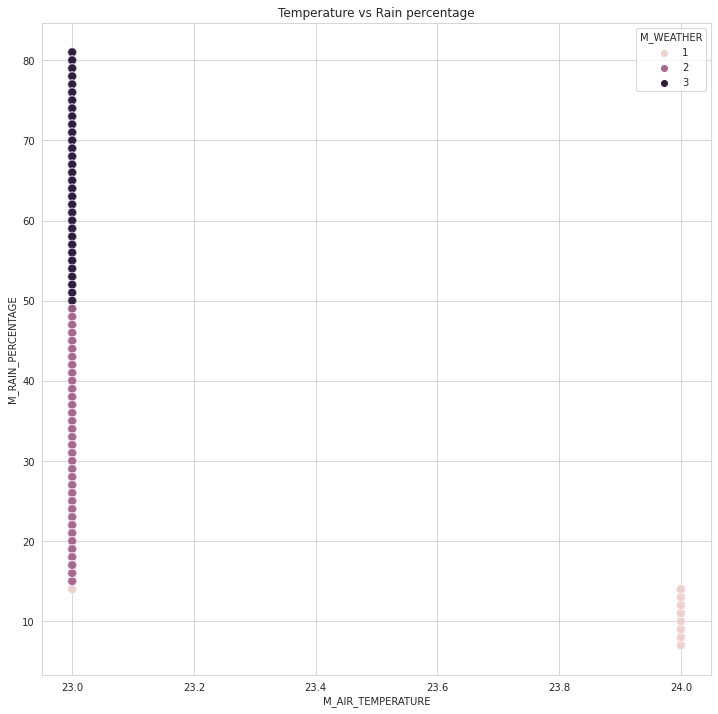

In [ ]:
# Plot for Air temperature & Humidity by Summary
plt.figure(figsize=(12,12))
plt.title('Temperature vs Rain percentage')
sns.scatterplot(x=extr_data.iloc[:,0],
                y=extr_data.iloc[:,2],
                hue=extr_data.iloc[:,3],
                s=75,
                alpha=0.3)
plt.show()

 # 1 = light cloud, 2 = overcast
        # 3 = light rain

       M_AIR_TEMPERATURE  M_TRACK_TEMPERATURE  M_RAIN_PERCENTAGE    M_WEATHER
count        2658.000000          2658.000000        2658.000000  2658.000000
mean           23.138826            29.942814          42.924379     2.262603
std             0.345830             1.310521          26.077948     0.699132
min            23.000000            28.000000           7.000000     1.000000
25%            23.000000            29.000000          17.000000     2.000000
50%            23.000000            30.000000          40.000000     2.000000
75%            23.000000            31.000000          69.000000     3.000000
max            24.000000            32.000000          81.000000     3.000000


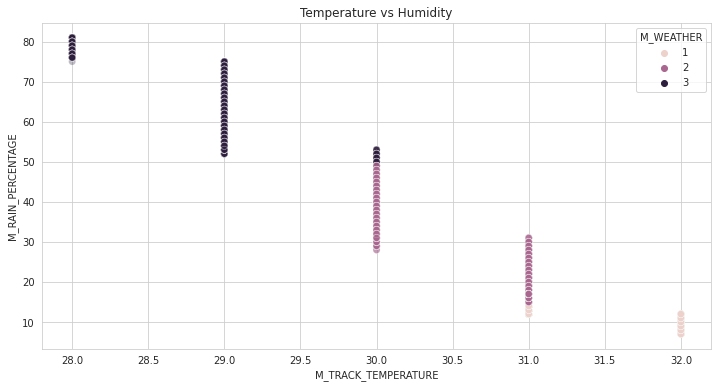

In [ ]:
# Plot for Temperature & Rain % by weather class
plt.figure(figsize=(12,6))
print(extr_data.describe())
plt.title('Temperature vs Humidity')
sns.scatterplot(x=extr_data.iloc[:,1],
                y=extr_data.iloc[:,2],
                hue=extr_data.iloc[:,3],
                s=50,
                alpha=0.3)
plt.show()

### Data Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


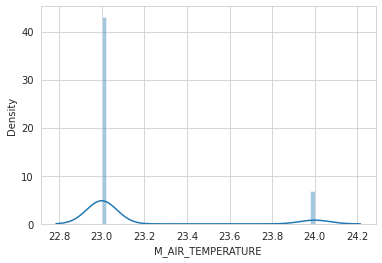

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


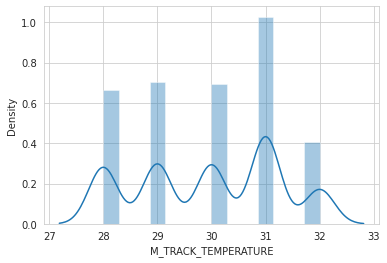

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


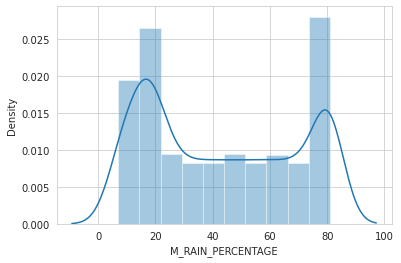

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


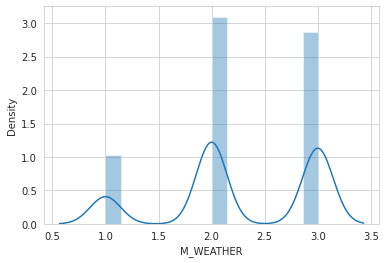

In [ ]:
for ind in range(len(extr_data.columns)):
    sns.distplot(extr_data.iloc[:, ind])
    plt.show()

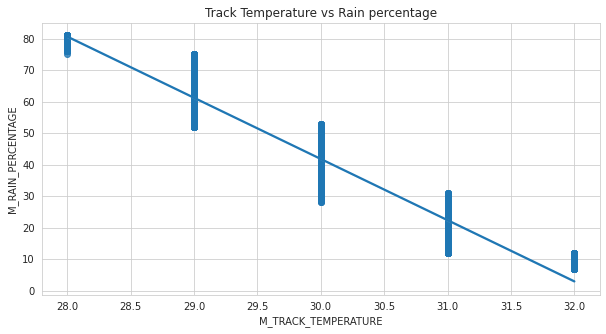

In [ ]:
# Regression plot for Apparent Temperature & Humidity
plt.figure(figsize=(10,5))
plt.title('Track Temperature vs Rain percentage')
sns.regplot(x=extr_data.iloc[:,1],
            y=extr_data.iloc[:,2])
plt.show()

# Data Exploration with added features from a new dataset

In this section we are going to explore the new dataset with added features:
- humidity
- wind bearing
- wind speed
- pressure

In [ ]:
import pickle
f = open("/content/drive/MyDrive/Travail/Hackathon/dataset/dataset_reoganized_extended_v1.pkl", 'rb')
dataset = pickle.load(f)


In [ ]:
dataset[0].columns

Index(['index', 'M_SESSION_LINK_IDENTIFIER', 'M_TRACK_TEMPERATURE',
       'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_WEATHER', 'M_TIME_OFFSET',
       'M_TRACK_TEMPERATURE_CHANGE', 'M_AIR_TEMPERATURE_CHANGE',
       'M_RAIN_PERCENTAGE', 'TIME_SESSION', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [ ]:
dataset_bis = dataset[15][['M_TRACK_TEMPERATURE',
        'M_AIR_TEMPERATURE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_WEATHER', 'M_TIME_OFFSET',
       'M_TRACK_TEMPERATURE_CHANGE', 'M_AIR_TEMPERATURE_CHANGE',
       'M_RAIN_PERCENTAGE','Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]

In [ ]:
dataset_bis.corr()

,M_TRACK_TEMPERATURE,M_AIR_TEMPERATURE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_WEATHER,M_TIME_OFFSET,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
M_TRACK_TEMPERATURE,1.000000,0.137534,5.799966e-01,NaN,NaN,-4.521166e-01,0.783968,-0.151504,NaN,-0.137534,-0.137534,0.137534,0.137534,-0.137534
M_AIR_TEMPERATURE,0.137534,1.000000,3.579531e-01,NaN,NaN,-3.077842e-01,0.107822,-0.406830,NaN,-1.000000,-1.000000,1.000000,1.000000,-1.000000
M_SESSION_TIME_LEFT,0.579997,0.357953,1.000000e+00,NaN,NaN,-1.268337e-15,0.396744,-0.371451,NaN,-0.357953,-0.357953,0.357953,0.357953,-0.357953
M_SESSION_DURATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M_WEATHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M_TIME_OFFSET,-0.452117,-0.307784,-1.268337e-15,NaN,NaN,1.000000e+00,-0.271917,0.137918,NaN,0.307784,0.307784,-0.307784,-0.307784,0.307784
M_TRACK_TEMPERATURE_CHANGE,0.783968,0.107822,3.967442e-01,NaN,NaN,-2.719168e-01,1.000000,-0.118775,NaN,-0.107822,-0.107822,0.107822,0.107822,-0.107822
M_AIR_TEMPERATURE_CHANGE,-0.151504,-0.406830,-3.714512e-01,NaN,NaN,1.379180e-01,-0.118775,1.000000,NaN,0.406830,0.406830,-0.406830,-0.406830,0.406830
M_RAIN_PERCENTAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Humidity,-0.137534,-1.000000,-3.579531e-01,NaN,NaN,3.077842e-01,-0.107822,0.406830,NaN,1.000000,1.000000,-1.000000,-1.000000,1.000000


In [ ]:
max_len = 0
indx = 0
for i, dframe in enumerate(dataset):
    l = dframe.shape[0]
    if 10000<l:
        print(f"{i} len : {l}")

    continue
    if max_len < dframe.shape[0]:
        max_len = dframe.shape[0]
        indx = i
print(indx)


In [ ]:
session = dataset[227]
# session.nunique()
session = session[['M_TRACK_TEMPERATURE', 'M_AIR_TEMPERATURE', 'M_WEATHER', 'M_TRACK_TEMPERATURE_CHANGE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', "Pressure (millibars)"]]
onehot = pd.get_dummies(session["M_WEATHER"])
onehot = onehot.rename(columns={0:"clear", 1:"light cloud", 2:"overcast"})
session = pd.concat([session, onehot], axis=1).drop(columns="M_WEATHER")


In [ ]:
session

,M_TRACK_TEMPERATURE,M_AIR_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),clear,light cloud,overcast
0,32,24,0,2,14,0.520797,10.539986,184.065359,12.129719,1012.13834,0,1,0
1,32,24,0,2,14,0.520797,10.539986,184.065359,12.129719,1012.13834,0,1,0
2,32,24,0,2,14,0.520797,10.539986,184.065359,12.129719,1012.13834,0,1,0
3,32,24,0,2,14,0.520797,10.539986,184.065359,12.129719,1012.13834,0,1,0
4,32,24,2,2,14,0.520797,10.539986,184.065359,12.129719,1012.13834,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14863,33,25,2,2,4,0.516218,9.638353,143.109244,12.197982,929.92563,1,0,0
14864,33,25,2,2,2,0.516218,9.638353,143.109244,12.197982,929.92563,1,0,0
14865,33,25,2,2,2,0.516218,9.638353,143.109244,12.197982,929.92563,1,0,0
14866,33,25,2,2,2,0.516218,9.638353,143.109244,12.197982,929.92563,1,0,0


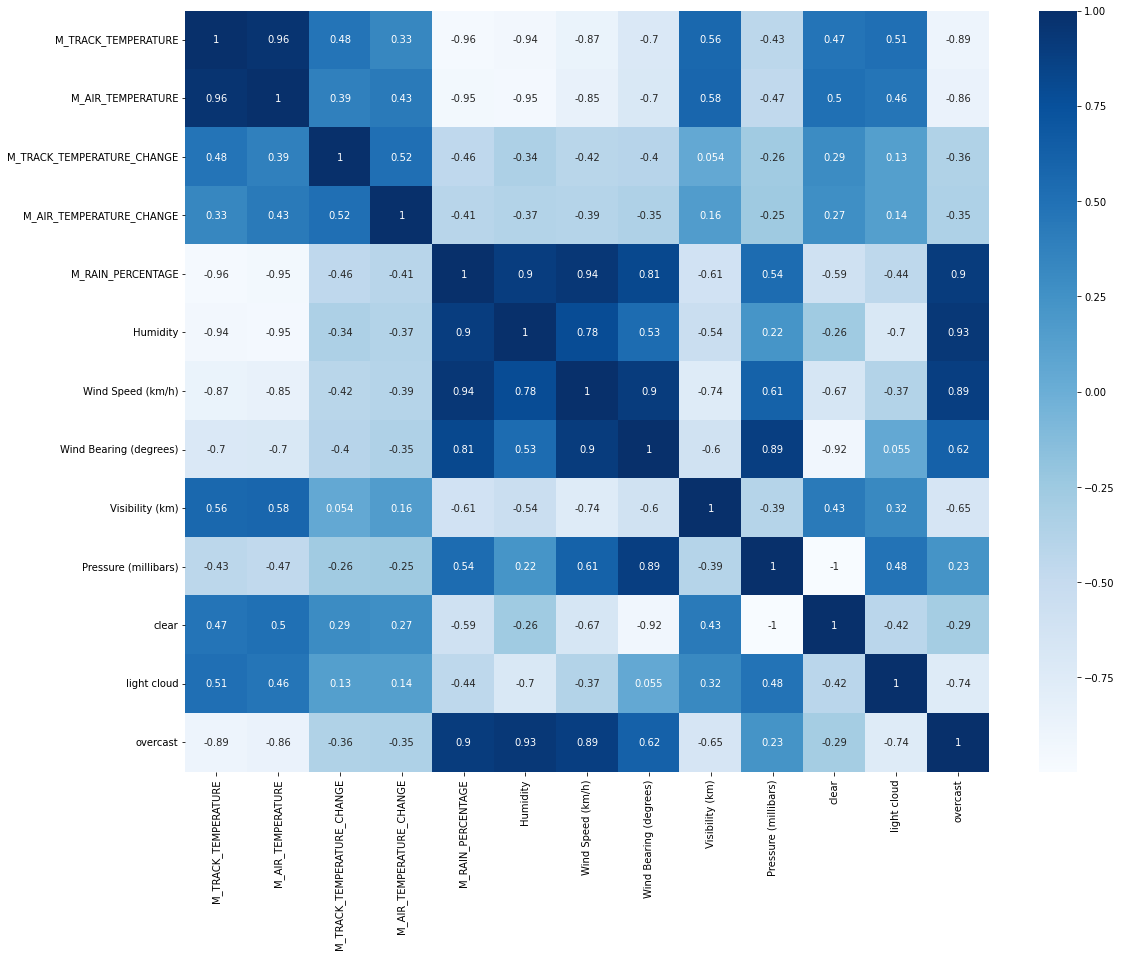

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(data=session.corr(), annot=True, cmap='Blues')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


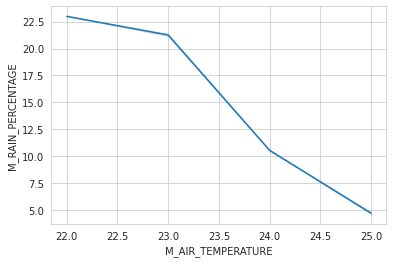

In [ ]:
plt.figure()
sns.lineplot(session["M_AIR_TEMPERATURE"], session["M_RAIN_PERCENTAGE"])
# sns.lineplot(session["M_TRACK_TEMPERATURE"], session["M_RAIN_PERCENTAGE"])
plt.show()

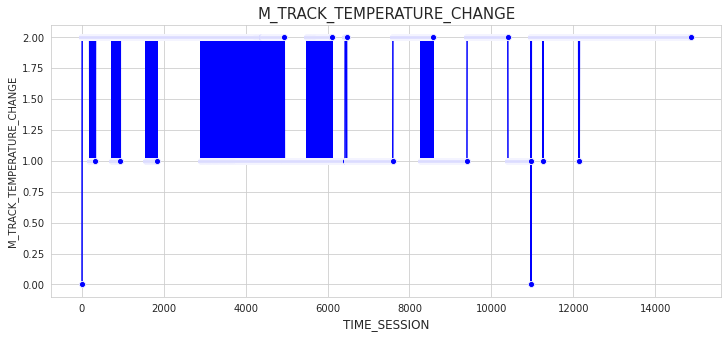

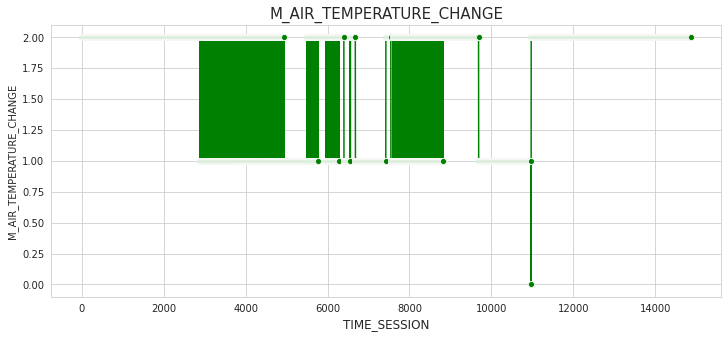

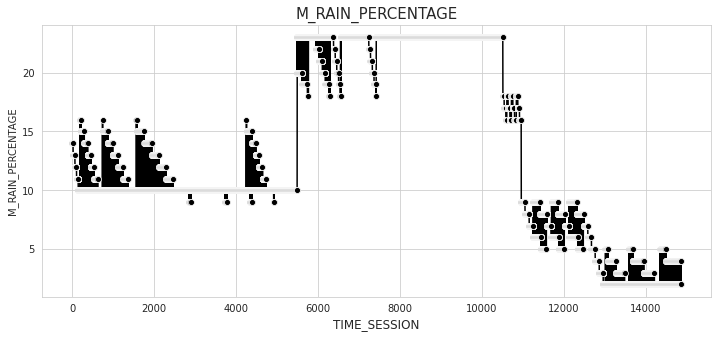

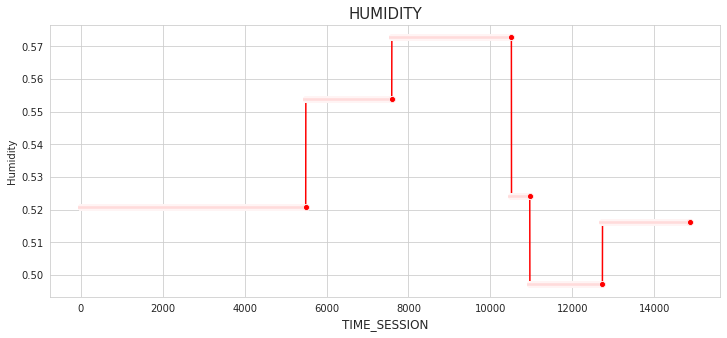

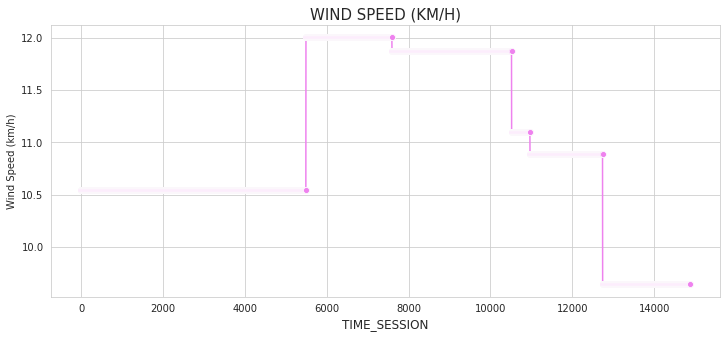

In [ ]:
# Plotting Weather Data
color={2:'blue',
       3:'green',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('TIME_SESSION', fontsize=12)
    plt.title('{}'.format(session.columns[index].upper()), fontsize=15)
    sns.lineplot(data=session.iloc[:,index], marker='o',  color=color[index])
    plt.show()

In [ ]:
for i, sess in enumerate(dataset):
    if (sess["M_WEATHER"]!=0).any():
        indx = np.argmax(sess["M_WEATHER"]>0)
        print(indx)
